# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import numpy as np
import tensorflow as tf

%matplotlib inline

In [2]:
# concat training and validation sets
dataset_train = get_dataset("/home/workspace/data/train/*.tfrecord")
dataset_val = get_dataset("/home/workspace/data/val/*.tfrecord")
dataset = dataset_train.concatenate(dataset_val)

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()
INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/val/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/val/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 10


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
type(dataset.take(1).as_numpy_iterator())

tensorflow.python.data.ops.dataset_ops._NumpyIterator

In [4]:
# TODO - Your implementation here
def display_images(batch):
    '''
    Display images and the bounding boxes of given  batch
    
    Arguments:
                batch: tensorflow dataset
    Return:
                images and corresponding bounding boxes
    '''
    # create color map for different objects
    colormap = {1: [1,0,0], 4: [0,1,0], 2: [0,0,1]}
    fig, ax = plt.subplots(2, 5, figsize=(20, 10))
    
    for i in range(len(batch)):
        x = i % 2
        y = i % 5
        
        img = batch[i]['image']
        ax[x,y].imshow(img.astype(np.uint8))
        
        bboxes = batch[i]['groundtruth_boxes']
        classes = batch[i]['groundtruth_classes']
        
        w, h, _ = img.shape
        # resize the bboxes
        bboxes[:, [0, 2]] *= w
        bboxes[:, [1, 3]] *= h
        
        # add bounding boxes to the image
        for cl, bb in zip(classes, bboxes):
            y1, x1, y2, x2 = bb
            rec = patches.Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none',
                           edgecolor=colormap[cl])
            ax[x, y].add_patch(rec)
        ax[x, y].axis('off')
    plt.tight_layout()
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

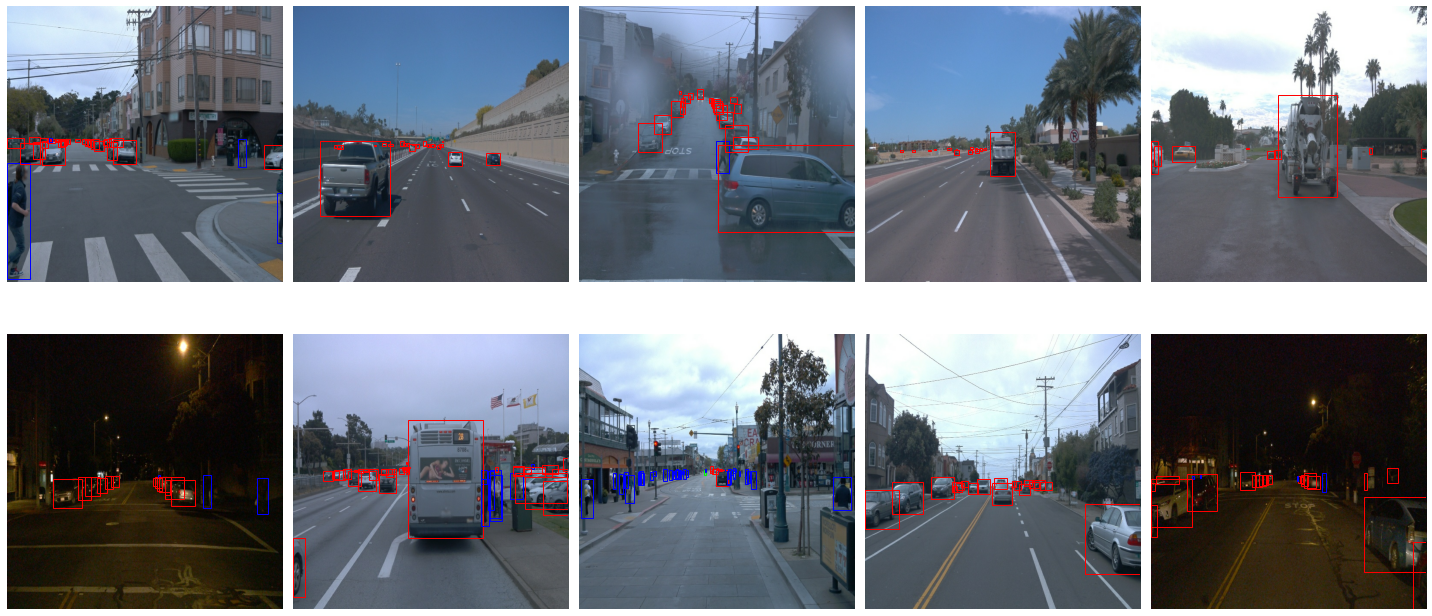

In [5]:
# Display 10 random images in dataset (train and validation set)
batch = list(dataset.shuffle(1000).take(10).as_numpy_iterator())
display_images(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [6]:
# collect the object classes of a portion of the dataset randomly
sample_num = 10000
class_list = []
image_dict = {'images contain vehicle': 0,
              'images contain pedestrian': 0,
              'images contain cyclist': 0
             }

for data in dataset.shuffle(10000).take(sample_num).as_numpy_iterator():
    gt_classes = list(data['groundtruth_classes'])
    class_list.extend(gt_classes)
    
    if 1 in gt_classes:
        image_dict['images contain vehicle'] += 1
    if 2 in gt_classes:
        image_dict['images contain pedestrian'] += 1
    if 4 in gt_classes:
        image_dict['images contain cyclist'] += 1

In [7]:
# convert number of images to the percentage
image_dict = {k: v / sample_num *100 for k, v in image_dict.items()}

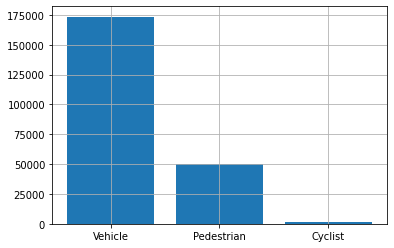

In [8]:
class_dict = {'Vehicle': class_list.count(1),
              'Pedestrian': class_list.count(2),
              'Cyclist': class_list.count(4)
             }
plt.bar(*zip(*class_dict.items()))
plt.grid()
plt.show()

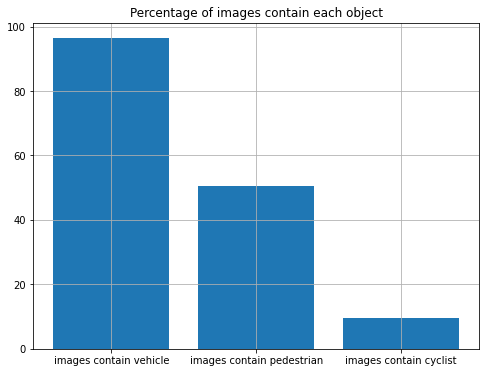

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
plt.bar(*zip(*image_dict.items()))
plt.title('Percentage of images contain each object')
plt.grid()
plt.show()